<a href=https://uplimit.com/course/r-for-data-science>
  <img src=https://imgur.com/6Vkc11w.png />
</a>

|        |                                   |                                   |                                 |                                |
| -------| ----------------------------------| -------------------------------- -| --------------------------------| ------------------------------------------|
| Week 1 | [[01] Doing Data Science](https://colab.research.google.com/drive/1aWpmzS36qVc8hNIaSSSHexlodwwyMJCB)           | [[02] Data Science in Action](https://colab.research.google.com/drive/1aWpmzS36qVc8hNIaSSSHexlodwwyMJCB)       | [[03] Importing Data](https://colab.research.google.com/drive/13kHBX3H1F2yx5yXWJ5iFZh48qjEtpLjU)             | [[04] Visualizing Data: Overview](https://colab.research.google.com/drive/1JSeDt-Gneegd5B2KwWTJF_igYPb-xsIv)          |
|        | [[05] Transforming Data: Overview](https://colab.research.google.com/drive/1IMZJFE8WmwjgdYCddvaO386PljKq_PjC)  | [[06] Transforming Data: Manipulate](https://colab.research.google.com/drive/19ClnAH7d30I9PkD9KuZndPmy5hxk3gdi) |                                 |                                           |
| Week 2 | [[07] Transforming Data: Aggregate](https://colab.research.google.com/drive/1zigvePewKpzKQHx2pjABXU6Ms8QzQXj7) | [[08] Transforming Data: Reshape](https://colab.research.google.com/drive/1Ma9VrM9SrkNEeXTSul0Ca8a7GHAeNLzC)   | [[09] Transforming Data: Combine](https://colab.research.google.com/drive/1JUGm1h4YPmCkre-rVUj5Ql7lBS66_xIs) | [[10] Visualizing Data: Grammar of Graphics](https://colab.research.google.com/drive/1YLE3NPp-TO2KUTohtidjzKMeqJVWxYoT) |
|        | [[11] Data Science in Action Again](https://colab.research.google.com/drive/1eWjVK4oEiXdwdP4sT0nOJlmkCMBkfLpz) |                                   |                                 |                                           |
Books | [Hands on Programming with R](https://rstudio-education.github.io/hopr/index.html) | [R for Data Science](https://r4ds.hadley.nz/) | [Elegant Graphics for Data Analysis](https://ggplot2-book.org/)



> 📕 __BEFORE YOU GET STARTED:__
> 1. Click on **Copy to Drive** to copy notebook to your drive.
> 2. Click on **Share** on the top-right corner (of your copied notebook).
> 3. Update sharing settings to **Anyone with link**
> 4. Delete this cell.


## Data Science in Action

The best way to get started is by carrying out an analysis from end-to-end. We will use a dataset with 100+ years of US baby names, compiled by the Social Security Administration (SSA). We will utilize the data science workflow to __import__ the data, __transform__ it, and __visualize__ trends in female names as an animated racing barchart!

> Don't worry if you don't follow all the code here. The idea is to show you what you can accomplish at the end of this course. The goal here is to run the code, tinker with it, and get a sense of how to do things. We will cover each of these topics in more detail in the later lessons.

Before we begin, we need to load the necessary packages. Recall that __packages__ are extensions to the R ecosystem and add new functionality. They are stored in a library. For this analysis, we will load the `tidyverse` package which is a collection of packages that make data analysis easier, and the `gganimate` package which will let us turn our visualization into an animated barchart.

In [ ]:
# Load packages and common utility functions
library(tidyverse)
url = "https://gist.githubusercontent.com/ramnathv/e71d3ffe88961fc4ef95642053012384/raw/9dda53562d06009912841ab3538d4aeb90e5ee09/_common.R"
download.file(url, basename(url))
source("_common.R")
install.packages(c('gganimate', 'gifski', 'base64'))
library(gganimate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Tracing function "install.packages" in package "utils"

Tracing function "update.packages" in package "utils"

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inspecting installed packages...

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘tweenr’


Inspecting installed packages...



### Import

The first step in any data analysis is importing the data. The baby names data is available as a gzipped csv file. We will read this file as a data frame using the function `read_csv()` from the `readr` package, which is a part of the `tidyverse`.

In [ ]:
file_path_names <- "https://raw.githubusercontent.com/ramnathv/corise-r-for-ds/main/data/names.csv.gz"
tbl_names <- readr::read_csv(file_path_names, show_col_types = FALSE)
head(tbl_names)

year,name,sex,nb_births
<dbl>,<chr>,<chr>,<dbl>
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
1880,Margaret,F,1578


The raw data on the SSA website is actually a zip file with multiple text files that needs to be processed further before we can read it into R as a table. The gory details of how we do this are presented in the next lesson, so you can enjoy creating your animated bar chart without much further ado.

### Transform

#### Step 1

Given, we want to visualize trends in the top female names, we first need to get a data frame with the top 100 female names of all time. We can do this by following a recipe that transforms the data one step at a time.

We take a data frame `tbl_names` containing information about baby names and their birth counts, filter it to keep only female names, group the remaining rows by name, and summarize the total number of births for each name group. Then we extract the top 100 female names by the number of births and store them in a new data frame `tbl_names_top_100_female`.

In [ ]:
tbl_names_top_100_female <- tbl_names |>
  # Keep ONLY Female names
  filter(sex == "F") |>
  # Group by name
  group_by(name) |>
  # Summarize the total number of births by group
  summarize(nb_births = sum(nb_births), .groups = "drop") |>
  # Slice the top 100 names by number of births
  slice_max(nb_births, n = 100)

tbl_names_top_100_female |>
  head()

name,nb_births
<chr>,<dbl>
Mary,4132497
Elizabeth,1661030
Patricia,1572795
Jennifer,1469379
Linda,1453755
Barbara,1435386


We can understand the code in greater detail by stepping through it one line at a time.

1. Takes the data frame `tbl_names`.

2. The `|>` operator (also known as the "pipe" operator) is used to pass the data frame to the next function in the chain.

3. The `filter()` function is used to keep only the rows where the `sex` column equals "F", meaning the female names.

4. The `group_by()` function is used to group the remaining rows by the `name` column.

5. The `summarize()` function is used to create a new data frame that summarizes the total number of births for each name group. The `nb_births` column is summed and the `.groups` argument is set to "drop" to remove the grouping information.

6. The `slice_max()` function is used to extract the top 100 names by the number of births. The `nb_births` column is used as the sorting variable, and the `n` argument is set to 100 to keep only the top 100 rows.

7. Finally, the resulting data frame with the top 100 female names is stored in the `tbl_names_top_100_female` variable.


#### Step 2

Now that we have the top 100 female names, we want to subset the names data to only retain the data for these 100 female names. Additionally, we want to add the rank for each name based on the number of births in that year. This will be very handy when we create the animated barchart.

In [ ]:
tbl_names_top_100_female_trends <- tbl_names |>
  # Keep ONLY female names in the top 100
  filter(name %in% tbl_names_top_100_female$name) |>
  # Group by year
  group_by(year) |>
  # Add dense rank for number of births in descending order
  mutate(rank = dense_rank(desc(nb_births))) |>
  # Keep ONLY rows that are in the top 20 ranks
  filter(rank <= 20)

tbl_names_top_100_female_trends |>
  head()

year,name,sex,nb_births,rank
<dbl>,<chr>,<chr>,<dbl>,<int>
1880,Mary,F,7065,1
1880,Anna,F,2604,2
1880,Emma,F,2003,3
1880,Elizabeth,F,1939,4
1880,Margaret,F,1578,5
1880,Alice,F,1414,6


We take the data frame `tbl_names` containing information about baby names and their birth counts, filter it to keep only the top 100 female names, group the remaining rows by year, compute the dense rank of the birth counts within each year, and then keep only the top 20 names in each year.

Let us dissect this code further by understanding what it does, step by step.

1. Takes the data frame `tbl_names`.

2. The `|>` operator (also known as the "pipe" operator) is used to pass the data frame to the next function in the chain.

3. The `filter()` function is used to keep only the rows where the `name` column is one of the top 100 female names in the `tbl_names_top_100_female` data frame.

4. The `group_by()` function is used to group the remaining rows by the `year` column.

5. The `mutate()` function is used to create a new column called `rank`, which represents the dense rank of the `nb_births` column in descending order. The `desc()` function is used to sort the `nb_births` column in descending order before computing the rank.

6. The `filter()` function is used to keep only the rows where the `rank` column is less than or equal to 20, which means the rows correspond to the top 20 names in each year.

7. Finally, the resulting data frame with the top 20 female names in each year is stored in the `tbl_names_top_100_female_trends` variable.

### Visualize

We can now visualize the data and create an animated racing barchart that shows the top 20 female baby names over time, with bars representing the number of births for each name in each year. The animation is created using the `gganimate` package, and the `dplyr` and `ggplot2` packages are used for data manipulation and plotting, respectively.

In [ ]:
options(jupyter.plot_mimetypes = "image/png")
anim <- tbl_names_top_100_female_trends |>
  # Filter for rows after the year 2000
  filter(year > 2000) |>
  # Create a column plot of rank vs. nb_births
  ggplot(aes(x = nb_births, y = fct_rev(factor(rank)))) +
  geom_col(aes(fill = name), show.legend = FALSE) +
  geom_text(
    aes(label = name),
    x = 0,
    hjust = 0,
    size = 5
  ) +
  scale_x_continuous(expand = c(0, 0)) +
  facet_null() +
  aes(group = name) +
  labs(
    title = 'Animated Barchart of Top Female Babynames',
    x = '# Births',
    y = NULL
  ) +
  theme_gray(base_size = 16) +
  theme(
    plot.title.position = 'plot',
    axis.ticks = element_blank(),
    axis.text.y = element_blank()
  ) +
  transition_time(year) +
  ease_aes('cubic-in-out') +
  labs(subtitle = "Year: {round(frame_time)}")

png_files = gganimate::animate(
  anim,
  renderer = file_renderer('/tmp/animation'),
  fps = 5,
  width = 500,
  height = 800
)


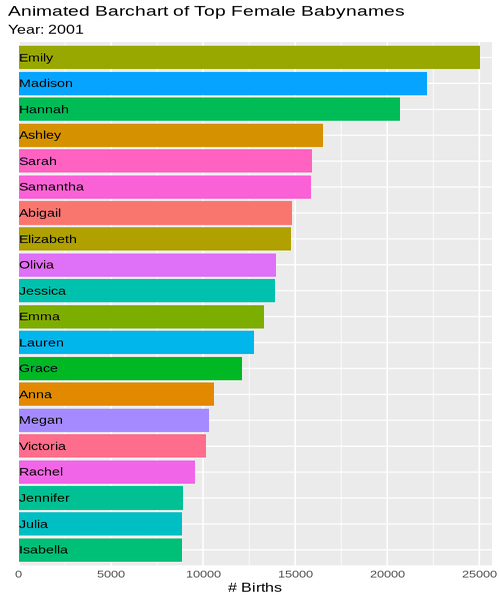

In [ ]:
gif_file <- gifski::gifski(png_files)
unlink("/tmp/animation", recursive=TRUE)
IRdisplay::display_html(base64::img(gif_file))

Here's what the code does step by step:

1. The `tbl_names_top_100_female_trends` data frame (which contains the top 20 female names for each year) is piped into the next function.

2. The `filter()` function is used to keep only the rows where the `year` column is greater than 2000.

3. The `ggplot()` function is used to initialize a new plot, specifying the `nb_births` and `rank` columns as the x and y aesthetic mappings, respectively. The `fct_rev()` function from the `forcats` package is used to reverse the order of the y-axis, so that the top-ranked names appear at the top of the plot.

4. The `geom_col()` function is used to create a bar chart, with the `fill` aesthetic mapping set to the `name` column to color the bars by name. The `show.legend` argument is set to `FALSE` to suppress the default legend. Note that the `ggplot()` function uses the `+` operator to add layers, scales, themes, and other components to the plot.

5. The `geom_text()` function is used to add text labels to the bars, with the `label` aesthetic mapping set to the `name` column. The `x` aesthetic mapping is set to 0, which aligns the text with the left edge of the plot. The `hjust` argument is set to 0, which left-aligns the text. The `size` argument is set to 5, which specifies the font size of the text.

6. The `scale_x_continuous()` function is used to set the limits of the x-axis to be exactly the range of data, with no extra padding on either end.

7. The `facet_null()` function is used to remove the default facetting, so that all the years are plotted together in a single panel.

8. The `aes()` function is used to set the `group` aesthetic mapping to the `name` column, which ensures that each name is animated separately.

9. The `labs()` function is used to set the plot title, subtitle, x-axis label, and y-axis label.

10. The `theme_gray()` function is used to set the base theme to a gray background with white gridlines, and a base font size of 16.

11. The `theme()` function is used to modify the plot title position, and remove the y-axis tick marks and labels.

12. The `transition_time()` function from the `gganimate` package is used to animate the plot over time, with the `year` column specifying the time variable.

13. The `ease_aes()` function is used to set the animation easing function to 'cubic-in-out'.

14. The resulting animation is stored in the `anim` variable.

### Your Turn

The best way to get started with learning is to tinker with the code and modifying it to explore alternate questions. Here are some ideas for you to start tinkering with this:

1. How about the top Male names instead of Female names.
2. What if you ONLY include top names of this decade.

Make small tweaks to the code and create your own animated racing barchart! Share any interesting observations you make while creating your version.

